In [527]:
#parses in data from JSON file
using JSON
open("byClasses2020.json", "r") do f
    global data
    rawstring = read(f, String)  # file information to string
    data=JSON.parse(rawstring)  # parse and transform data
end
rawdata = permutedims(convert(Array{Any,2}, hcat(data...)));
keys = ["Semester" "Division" "Dept" "Num" "Course Name" "Hours Per Week" "Instructor: Overall effectiveness" "Instructor: Feedback helpfulness" "Instructor: Availability" "Instructor: Stimulates interest" "Instructor: Enthusiasm" "Instructor: Respect for students" "Instructor: Communicated how to succeed" "Instructor: Clarity" "Course: Overall effectiveness" "Course: Assignments measured knowledge" "Course: Amount learned" "Student: Percent homework completion" "Student: Percent attendance"]

1×19 Array{String,2}:
 "Semester"  "Division"  "Dept"  "Num"  …  "Student: Percent attendance"

In [1]:
1+1

2

In [664]:
open("byProf2020.json", "r") do f
    global data2
    rawstring2 = read(f, String)
    data2 = JSON.parse(rawstring2)
end
prawdata = permutedims(convert(Array{Any,2}, hcat(data2...)));

In [821]:
proflist = prawdata[:,3]
proflist = unique(proflist)
function findprofclass(prof)
    return findall(x->x==prof,prawdata[:,3])
end

profratingdata = []
for prof in proflist
    ratinglist = []
    classlist = findprofclass(prof)
    classnums = prawdata[classlist, 7]
    for i in 1:length(classlist)
        profscoreval = profScore(prawdata[classlist[i],9:16])
        if isnan(profscoreval)
            classlist[i] = 0
            push!(ratinglist, 0)
        else
            push!(ratinglist, profscoreval)
        end
    end
    push!(profratingdata, sum(ratinglist.*classnums)/sum(classnums))
end

profratings = hcat(proflist, profratingdata)

profcompratings = []
for prof in proflist
    templist = []
    classlist = findprofclass(prof)
#     classnums = prawdata[classlist, 7]
    profscoreval = prawdata[classlist, 9:16]
    #println(profscoreval)
    for n = 9:16
        classnums = prawdata[classlist[:], 7]
        #println(classnums)
        for i = 1:length(classlist)
            #nanvals = findall(x->x==nothing,profscoreval[i, n-8])
            nanvals = profscoreval[i,n-8] == nothing
            #println(classnums[:], " ",nanvals)
            #println(classnums[1])
            if nanvals
                classnums[i] -= 1
            end
        end
        #if !any([isnan(x) for x in prawdata[classlist[:],n]])
        nanvals2 = findall(x->x==nothing,profscoreval[i,:])
        #println(nanvals2)
        profscoreval[nanvals2.-8] .= 0
        #println(profscoreval)
        profscorerating = sum(profscoreval.*classnums)/sum(classnums)
#         println(profscorerating)
        push!(templist, profscorerating)
        println(templist)
    end
    vcat(profcompratings, templist)
end

Any[35.0]
Any[35.0, 35.0]
Any[35.0, 35.0, 35.0]
Any[35.0, 35.0, 35.0, 35.0]
Any[35.0, 35.0, 35.0, 35.0, 35.0]
Any[35.0, 35.0, 35.0, 35.0, 35.0, 35.0]
Any[35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0]
Any[35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0]
Any[37.9]
Any[37.9, 37.9]
Any[37.9, 37.9, 37.9]
Any[37.9, 37.9, 37.9, 37.9]
Any[37.9, 37.9, 37.9, 37.9, 37.9]
Any[37.9, 37.9, 37.9, 37.9, 37.9, 37.9]
Any[37.9, 37.9, 37.9, 37.9, 37.9, 37.9, 37.9]
Any[37.9, 37.9, 37.9, 37.9, 37.9, 37.9, 37.9, 37.9]
Any[39.019999999999996]
Any[39.019999999999996, 39.019999999999996]
Any[39.019999999999996, 39.019999999999996, 39.019999999999996]
Any[39.019999999999996, 39.019999999999996, 39.019999999999996, 39.019999999999996]
Any[39.019999999999996, 39.019999999999996, 39.019999999999996, 39.019999999999996, 39.019999999999996]
Any[39.019999999999996, 39.019999999999996, 39.019999999999996, 39.019999999999996, 39.019999999999996, 39.019999999999996]
Any[39.019999999999996, 39.019999999999996, 39.0199999999999

Any[36.13333333333333, 36.13333333333333, 36.13333333333333, 36.13333333333333, 36.13333333333333, 36.13333333333333, 36.13333333333333, 36.13333333333333]
Any[33.699999999999996]
Any[33.699999999999996, 33.699999999999996]
Any[33.699999999999996, 33.699999999999996, 33.699999999999996]
Any[33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996]
Any[33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996]
Any[33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996]
Any[33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996]
Any[33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996, 33.699999999999996]
Any[37.15]
Any[37.15, 37.15]
Any[37.15, 37.15, 37.15]
Any[37.15, 37.15, 37.15, 37.15]
Any[37

Any[38.84, 38.84, 38.84, 38.84, 38.84, 38.84, 38.84]
Any[38.84, 38.84, 38.84, 38.84, 38.84, 38.84, 38.84, 38.84]
Any[38.4]
Any[38.4, 38.4]
Any[38.4, 38.4, 38.4]
Any[38.4, 38.4, 38.4, 38.4]
Any[38.4, 38.4, 38.4, 38.4, 38.4]
Any[38.4, 38.4, 38.4, 38.4, 38.4, 38.4]
Any[38.4, 38.4, 38.4, 38.4, 38.4, 38.4, 38.4]
Any[38.4, 38.4, 38.4, 38.4, 38.4, 38.4, 38.4, 38.4]
Any[38.85]
Any[38.85, 38.85]
Any[38.85, 38.85, 38.85]
Any[38.85, 38.85, 38.85, 38.85]
Any[38.85, 38.85, 38.85, 38.85, 38.85]
Any[38.85, 38.85, 38.85, 38.85, 38.85, 38.85]
Any[38.85, 38.85, 38.85, 38.85, 38.85, 38.85, 38.85]
Any[38.85, 38.85, 38.85, 38.85, 38.85, 38.85, 38.85, 38.85]
Any[32.34]
Any[32.34, 32.34]
Any[32.34, 32.34, 32.34]
Any[32.34, 32.34, 32.34, 32.34]
Any[32.34, 32.34, 32.34, 32.34, 32.34]
Any[32.34, 32.34, 32.34, 32.34, 32.34, 32.34]
Any[32.34, 32.34, 32.34, 32.34, 32.34, 32.34, 32.34]
Any[32.34, 32.34, 32.34, 32.34, 32.34, 32.34, 32.34, 32.34]
Any[36.449999999999996]
Any[36.449999999999996, 36.449999999999996]
Any

LoadError: MethodError: no method matching *(::Nothing, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:538
  *(!Matched::ChainRulesCore.DoesNotExist, ::Any) at /home/tada/.julia/packages/ChainRulesCore/eBwSt/src/differential_arithmetic.jl:28
  *(!Matched::PyCall.PyObject, ::Any) at /home/tada/.julia/packages/PyCall/tqyST/src/pyoperators.jl:13
  ...

In [809]:

classlist = findprofclass(proflist[1])
profscoreval = prawdata[classlist, 9:16]
profscoreval[5] = nothing
println(profscoreval)
nanvals = findall(x->x==nothing,profscoreval[1, 1:7])


classnums = Vector(prawdata[classlist, 7])
println(classnums[2])

println(classnums[nanvals[:]])

Any[4.6 3.9 4.7 4.0 nothing 4.7 4.4 4.3]


LoadError: BoundsError: attempt to access 1-element Array{Any,1} at index [2]

In [820]:
size(profcompratings)

(0,)

In [974]:
profratings[492,:]

2-element Array{Any,1}:
  "Harmon, Stephen"
 0.0

In [972]:
minimum(profratings[:,2])
findall(x->x==0.0, profratings[:,2])

1-element Array{Int64,1}:
 492

In [970]:
findall(x->x=="Houdre, Christian", profratings[:,1])
profratings[536,:]

2-element Array{Any,1}:
   "Houdre, Christian"
 15.568

In [718]:
findall(x->x=="Chow, Edmond", profratings[:,1])
profratings[203,:]

2-element Array{Any,1}:
   "Chow, Edmond"
 88.033

In [738]:
proflist[findall(x->isnan(x), profratings[:,2])]
notnanvals = [i for i in profratingdata if !isnan(i)];
mean(notnanvals)

85.39553484139257

In [741]:
mean(profratingdata)

85.39553484139255

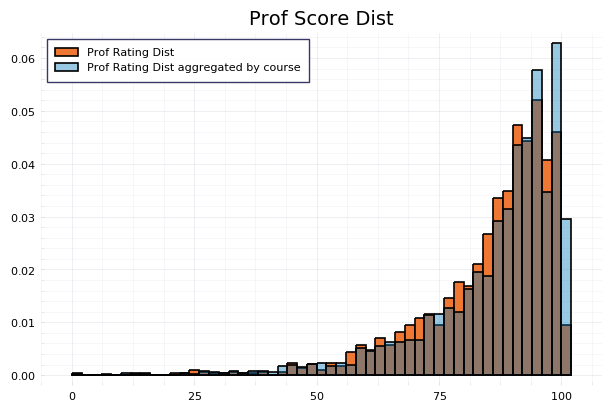

ProfVariance: 182.91230639369644 ProfVariance by Course: 194.14009235963354


In [828]:
plot1 = histogram(profratingdata[:], bins = 60, normed = true, fillalpha=1, show = true, label="Prof Rating Dist", title="Prof Score Dist")
histogram!(scoredData[:,20], bins = 60, normed = true, fillalpha=0.4, show = true, label="Prof Rating Dist aggregated by course")
println("ProfVariance: ",var(profratingdata), " ", "ProfVariance by Course: ",var(scoredData[:,20]))

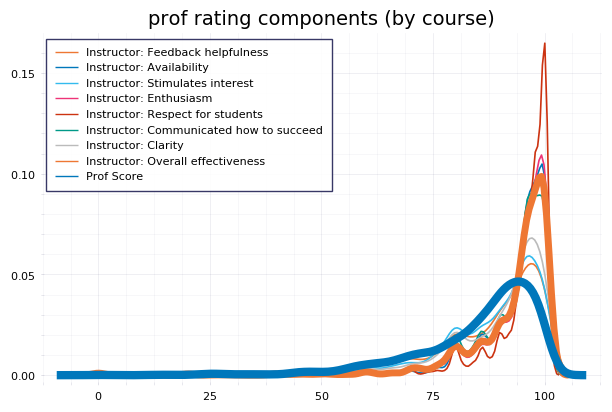

In [829]:
plot2= plot(title = "prof rating components (by course)")
for i = 10:16
    plot!(remnothing(prawdata,i)./5*100, show=true, label=keys[i-2], seriestype=:density, bins = 60, fillalpha=0.5);
end
plot!(remnothing(prawdata,9)./5*100, linewidth = 5, label = keys[7], seriestype=:density, bins = 60);
plot!(profratingdata[:], seriestype=:density, linewidth=6, label=keys[20]);

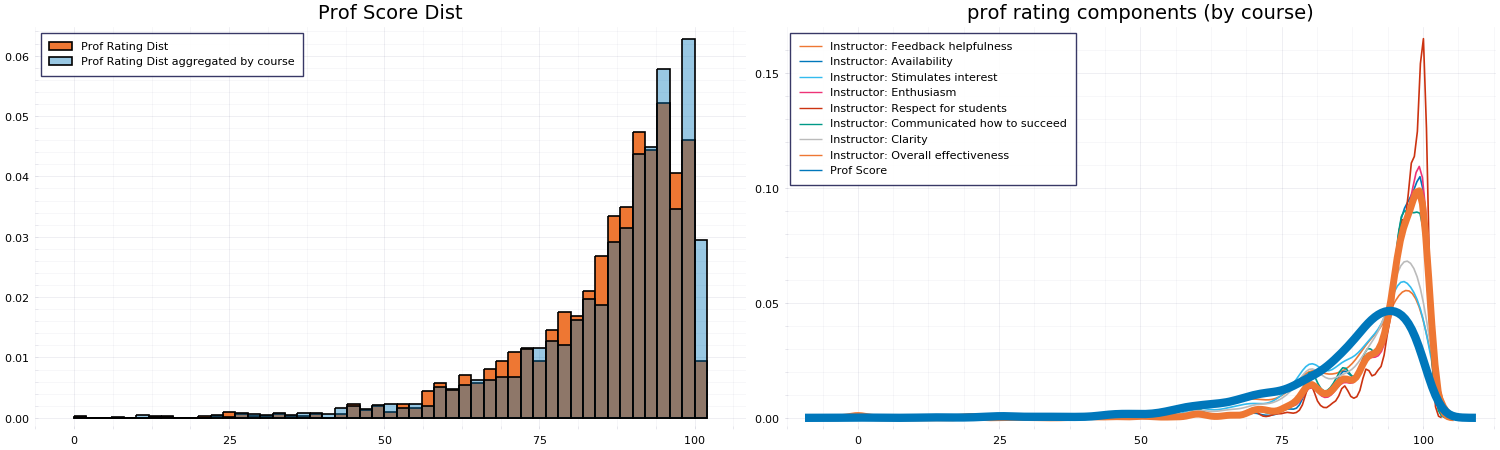

In [831]:
plot(plot1, plot2, layout = (1,2), size=(1500,450))

In [162]:
#professor scoring function
function profScore(scores)
    weights = [.5 .1 .1 .05 .05 .05 .05 .1]
    exp = [2.5 2 1 1 3 2 1 1]
    for i in 1:length(scores)
        if scores[i] == nothing
            weights[i] = 0
            scores[i] = 0
        end
    end
    totalScore = 0
    for i in 1:length(scores)
        totalScore += ((.2*scores[i])^exp[i])*weights[i]
    end
    normalizedScore = round(totalScore/sum(weights)*100, digits=3)
    return normalizedScore
end

#course scoring function
function courseScore(scores)
    weights = [.5 .2 .2 .1]
    exp = [2.5 2 1 1]
    for i in 1:length(scores)
        if scores[i] == nothing
            weights[i] = 0
            scores[i] = 0
        end
    end
    totalScore = 0
    for i in 1:length(scores)-1
        totalScore += ((.2*scores[i])^exp[i])*weights[i]
    end
    totalScore += scores[4]/100*weights[4]
    return round(totalScore/sum(weights)*100, digits=3)
end

courseScore (generic function with 1 method)

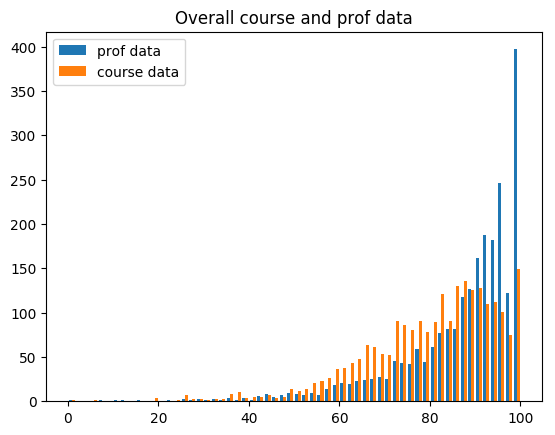

In [320]:
#evaluating professor score function for all entries
profdata = []
coursedata = []
for i = 1:size(rawdata)[1]
    push!(profdata, profScore(rawdata[i,7:14]))
end
scoredData = hcat(rawdata, profdata);
for i = 1:size(scoredData)[1]
     push!(coursedata, courseScore(vcat(scoredData[i,15:17],scoredData[i,20])))
end
scoredData = hcat(scoredData, coursedata);
plt.hist(hcat(profdata,coursedata), density = false, bins = 60);
legend(["prof data", "course data"]);
title("Overall course and prof data");

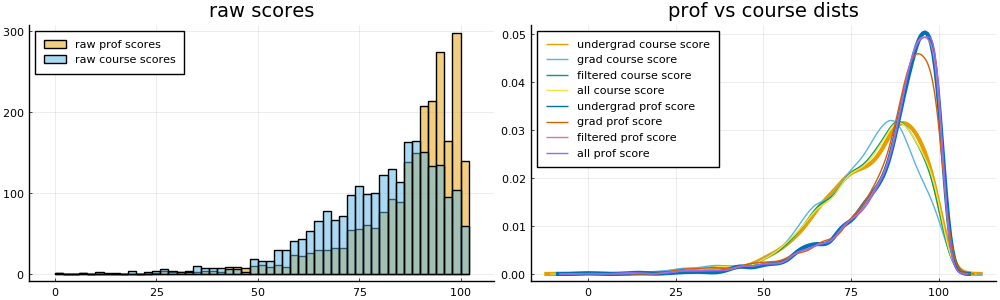

In [633]:
plot1 = histogram(scoredData[:,20], label="raw prof scores", bins = 60, fillalpha = 0.5, title="raw scores")
histogram!(scoredData[:,21], label="raw course scores", bins = 60, fillalpha = 0.5)

plot2 = density(title="prof vs course dists")
densitycompare(21, "course score")
densitycompare(20, "prof score")
plot(plot1, plot2, layout = (1,2), size = (1000,300))

In [287]:
#sorting out all not really course courses
filteredData = []
filterlist = ["Transfer" "Special Problem" "Support for" "Research" "Project" "Recitation" "Lab" "Seminar" "Preparation" "Thesis" "Teaching Assistant" "Internship"]
for col in eachcol(permutedims(scoredData))
    if !any([occursin(string, col[5]) for string in filterlist])        
        push!(filteredData, col)
    end
end
filteredData = permutedims(convert(Array{Any,2}, hcat(filteredData...)));

In [429]:
function remnothing(arr, n)
    return [arr[i,n] for i in 1:size(arr)[1] if arr[i,n] != nothing]
end

remnothing (generic function with 1 method)

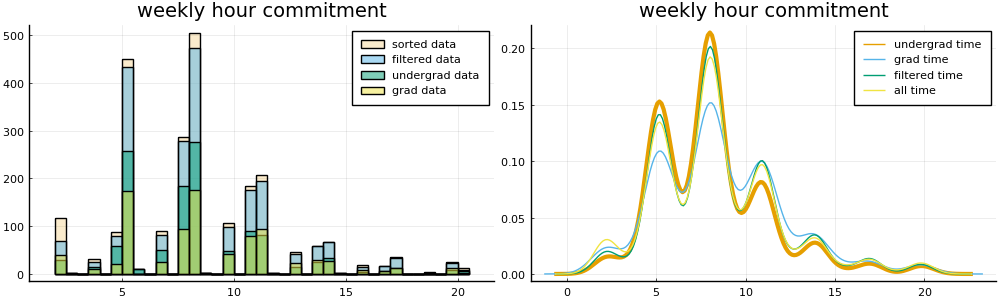

In [618]:
plot1 = histogram(remnothing(scoredData,6), bins = 40, label="sorted data", fillalpha=0.2, title="weekly hour commitment")
histogram!(remnothing(filteredData, 6), bins = 40, label="filtered data", fillalpha = 0.5)
histogram!(remnothing(undergradData,6), bins = 40, label="undergrad data", fillalpha = 0.5)
histogram!(remnothing(gradData,6), bins = 40, label="grad data", fillalpha=0.5)
#normed = true for density

plot2 = density(title = "weekly hour commitment")
densitycompare(6, "time")

plot(plot1, plot2, layout=(1,2), size=(1000,300))

In [848]:
using StatsBase
println(skewness(remnothing(filteredData,6)))
println(skewness(remnothing(filteredData,20)))
println(skewness(remnothing(filteredData,21)))
println(skewness(remnothing(profratingdata,1)))

0.8555303581334496
-1.8267453919633145
-1.1134867762710876
-1.7925720820940316


In [844]:
println("Variance of ",keys[6], " is ", var(remnothing(filteredData,6)))
println("Variance of ",keys[6], " is ", var(remnothing(filteredData,6)./20*100))
for i in [7, 15]
    vars = var(remnothing(filteredData, i)./5*100)
    println("Variance of ", keys[i], " is ", vars)
end
for i in [20, 21]
    vars = var(remnothing(filteredData, i))
    println("Variance of ", keys[i], " is ", vars)
end

Variance of Hours Per Week is 11.434717043162879
Variance of Hours Per Week is 285.867926079072
Variance of Instructor: Overall effectiveness is 87.22699204991366
Variance of Course: Overall effectiveness is 90.64055595000617
Variance of Prof Score is 189.92552058324816
Variance of Course Score is 213.1927689702947


In [650]:
println(mean(remnothing(filteredData, 7)./5*100))

93.12832263978002


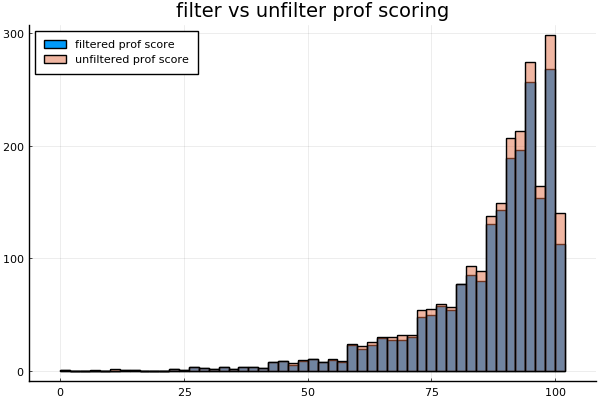

In [295]:
#graphing filtered courses professor score
#plt.hist(filteredData[:,21], density = false, bins = 60);
#title("filtered course scoring")
#unfiltered comparison
#plt.hist(scoredData[:,21], bins = 60)

histogram(filteredData[:,20], bins = 60, label="filtered prof score")
histogram!(scoredData[:,20], bins = 60, fillalpha=0.5, label="unfiltered prof score", title="filter vs unfilter prof scoring")

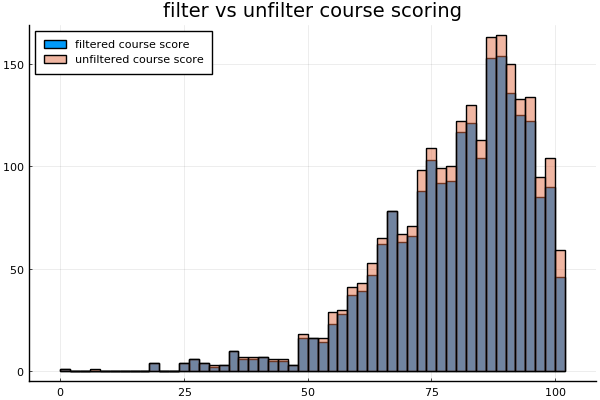

In [293]:
histogram(filteredData[:,21], bins = 60, label="filtered course score")
histogram!(scoredData[:,21], bins = 60, fillalpha=0.5, label="unfiltered course score", title="filter vs unfilter course scoring")

In [361]:
undergradData = [filteredData[i,:] for i in 1:size(filteredData)[1] if any([filteredData[i,4][1] == j for j in ['1' '2' '3' '4']])]
undergradData = permutedims(convert(Array{Any,2}, hcat(undergradData...)));

gradData = [filteredData[i,:] for i in 1:size(filteredData)[1] if any([filteredData[i,4][1] == j for j in ['5' '6' '7' '8']])]
gradData = permutedims(convert(Array{Any,2}, hcat(gradData...)));

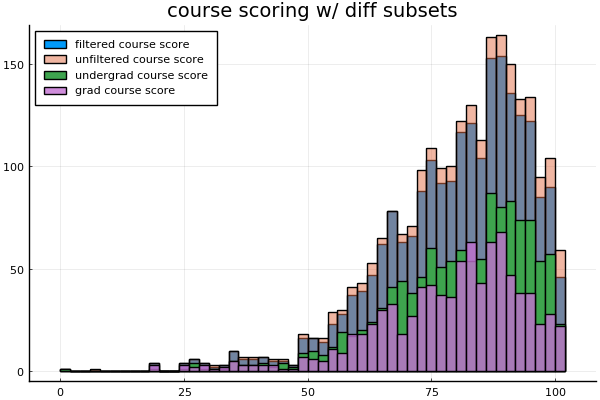

In [364]:
histogram(filteredData[:,21], bins = 60, label="filtered course score", density = true)
histogram!(title="course scoring w/ diff subsets")
histogram!(scoredData[:,21], bins = 60, fillalpha=0.5, label="unfiltered course score")
histogram!(undergradData[:,21], bins = 60, label="undergrad course score", density = true)
histogram!(gradData[:,21], bins = 60, label="grad course score", density = true, fillalpha = 0.8)

#plot!(filteredData[:,21], bins = 60, seriestype=:stephist)

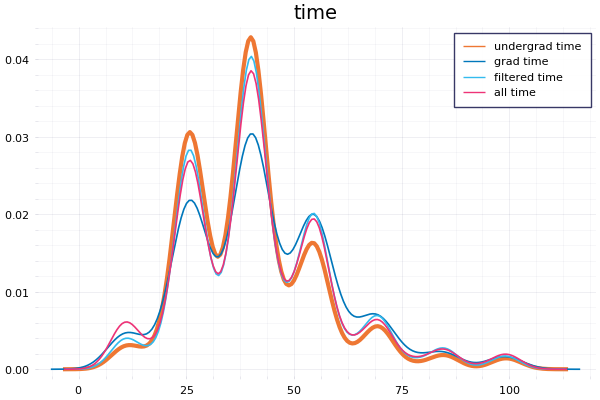

In [841]:
using StatsPlots
function densitycompare(i, ntitle)
    density!(remnothing(undergradData,i)./*100, label="undergrad " * ntitle, linewidth = 3)
    density!(remnothing(gradData,i)./20*100, label="grad " * ntitle)
    density!(remnothing(filteredData,i)./20*100, label="filtered " * ntitle)
    density!(remnothing(scoredData,i)./20*100, label="all " * ntitle)
end

density(title = "time")
densitycompare(6, "time")

In [838]:
maximum(remnothing(undergradData,6))

20.0

In [979]:
maximum(profdata[:])

100.0

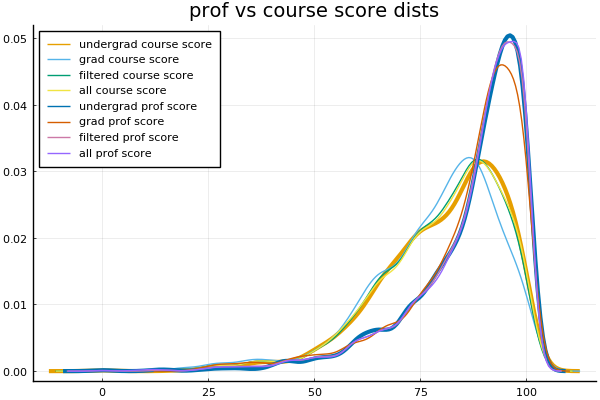

In [616]:
density(title = "prof vs course score dists")
plot1 = densitycompare(21, "course score")
plot2 = densitycompare(20, "prof score")
#plot(plot1, plot2, layout = (1,2))

In [373]:
using Statistics
println(mean(gradData[:,21]))
println(mean(undergradData[:,21]))
println(mean([gradData[i,15] for i in 1:size(gradData)[1] if gradData[i,15] != nothing])/5*100)
println(mean([undergradData[i,15] for i in 1:size(undergradData)[1] if undergradData[i,15] != nothing])/5*100)


78.68968104426783
80.38832703368944
89.53007945516461
90.21875000000004


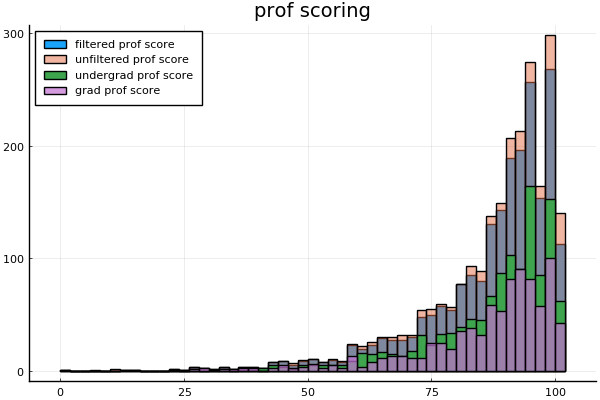

In [448]:
histogram(filteredData[:,20], bins = 60, label="filtered prof score", fillalpha = 0.9)
histogram!(scoredData[:,20], bins = 60, fillalpha=0.5, label="unfiltered prof score", title="prof scoring")
histogram!(undergradData[:,20], bins = 60, label="undergrad prof score", density = true)
histogram!(gradData[:,20], bins = 60, label="grad prof score", density = true, fillalpha = 0.7)

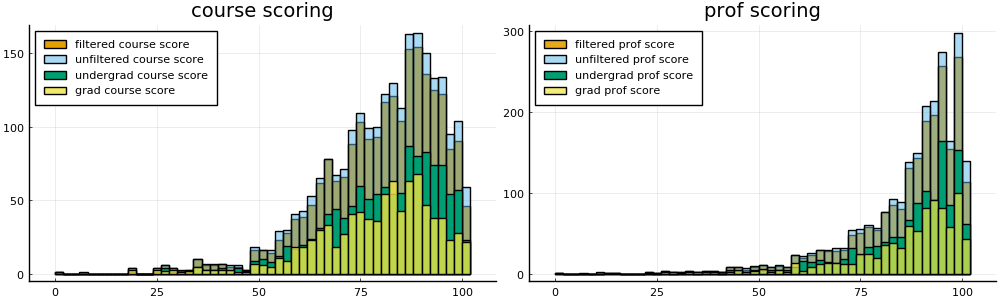

In [608]:
theme(:wong)
#default(size=(1000,300))

plot2 = histogram(filteredData[:,20], bins = 60, label="filtered prof score", fillalpha = 0.9)
histogram!(scoredData[:,20], bins = 60, fillalpha=0.5, label="unfiltered prof score", title="prof scoring")
histogram!(undergradData[:,20], bins = 60, label="undergrad prof score", density = true)
histogram!(gradData[:,20], bins = 60, label="grad prof score", density = true, fillalpha = 0.7)

plot1 = histogram(filteredData[:,21], bins = 60, label="filtered course score", density = true)
histogram!(title="course scoring")
histogram!(scoredData[:,21], bins = 60, fillalpha=0.5, label="unfiltered course score")
histogram!(undergradData[:,21], bins = 60, label="undergrad course score", density = true)
histogram!(gradData[:,21], bins = 60, label="grad course score", density = true, fillalpha = 0.8)
    
plot(plot1, plot2, layout = (1,2), size=(1000,300))

In [573]:
Plots.reset_defaults()

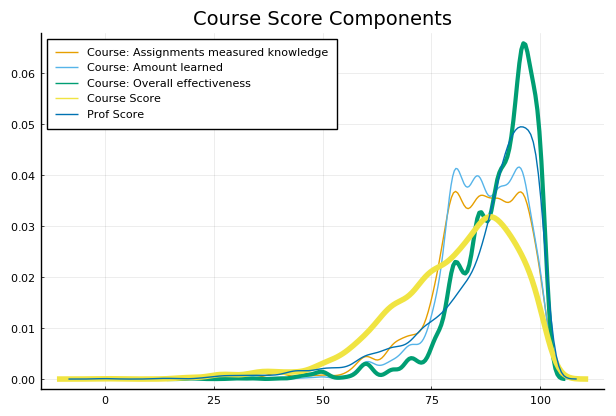

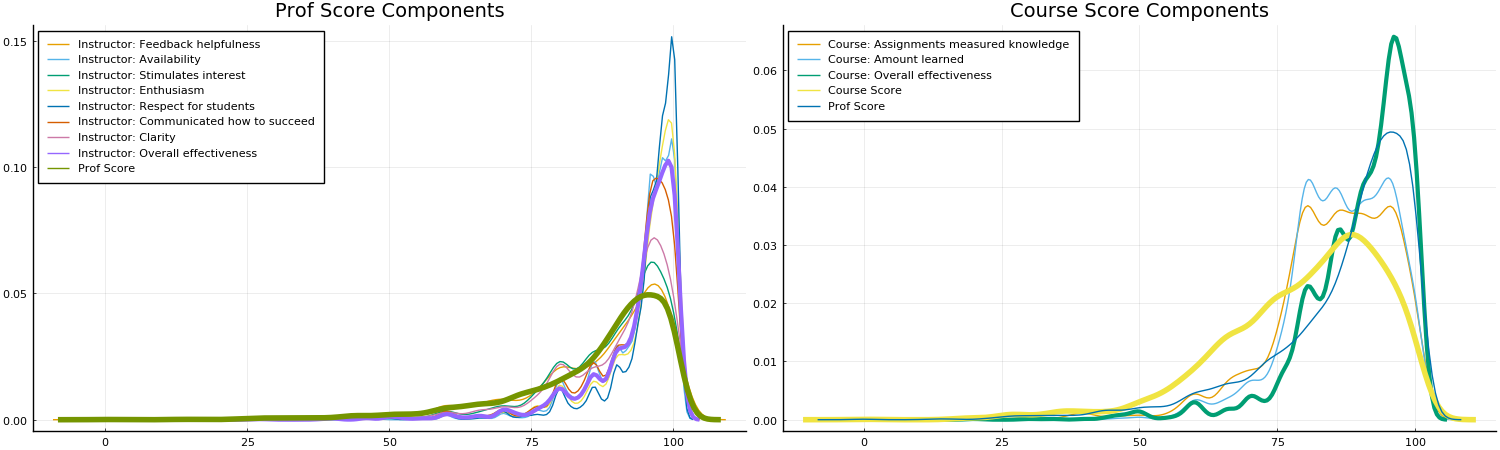

In [619]:
function componentgraph(indices, most, targ, titlen, titlet)
    density(title = titlen)
    for i = indices
        density!(remnothing(filteredData,i)./5*100, label=keys[i], show = true)
    end
    density!(remnothing(filteredData,most)./5*100, label=keys[most], linewidth = 3)
    density!(remnothing(filteredData,targ), label=titlet, linewidth = 4)
end

plot1 = componentgraph(8:14, 7, 20, "Prof Score Components", "Prof Score");
plot2 = componentgraph(16:17, 15, 21, "Course Score Components", "Course Score");
density!(remnothing(filteredData,20), label="Prof Score");
theme(:wong)
plot(plot1,plot2, layout = (1,2), size = (1500,450))

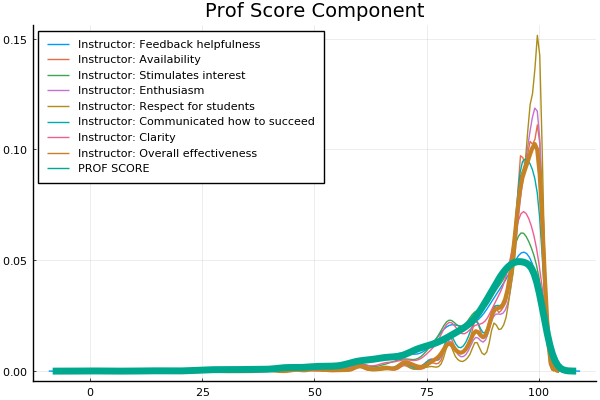

In [575]:
density(remnothing(filteredData,8)./5*100, label = keys[8])
density!(remnothing(filteredData,9)./5*100, label = keys[9])
density!(remnothing(filteredData,10)./5*100, label = keys[10])
density!(remnothing(filteredData,11)./5*100, label = keys[11])
density!(remnothing(filteredData,12)./5*100, label = keys[12])
density!(remnothing(filteredData,13)./5*100, label = keys[13])
density!(remnothing(filteredData,14)./5*100, label = keys[14])
#histogram!(filteredData[:,20], normed = true, fillalpha=0.5, bin = 90)
density!(remnothing(filteredData,7)./5*100, linewidth = 3, label = keys[7])
density!(filteredData[:,20], linewidth=5, label = "PROF SCORE", title = "Prof Score Component")


In [539]:
println(keys[7:14])
println(keys[15:17])

["Instructor: Overall effectiveness", "Instructor: Feedback helpfulness", "Instructor: Availability", "Instructor: Stimulates interest", "Instructor: Enthusiasm", "Instructor: Respect for students", "Instructor: Communicated how to succeed", "Instructor: Clarity"]
["Course: Overall effectiveness", "Course: Assignments measured knowledge", "Course: Amount learned"]


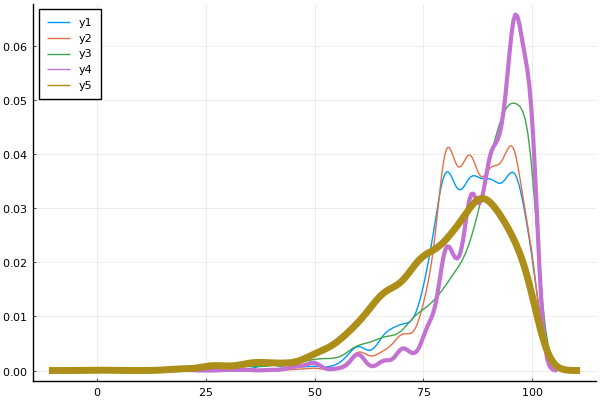

In [519]:
density(remnothing(filteredData,16)./5*100)
density!(remnothing(filteredData,17)./5*100)
density!(remnothing(filteredData,20))
density!(remnothing(filteredData,15)./5*100, linewidth = 3)
density!(remnothing(filteredData,21), linewidth=5)

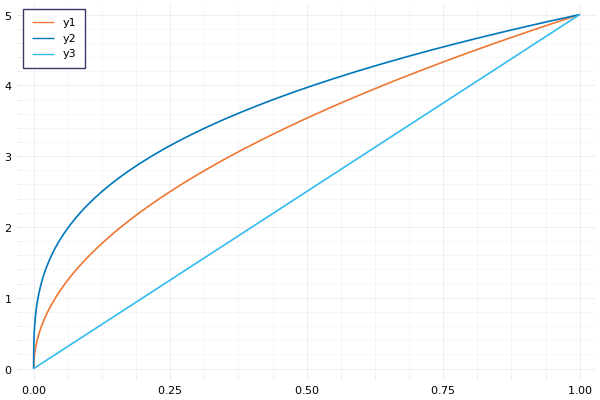

In [669]:
scores = 0:0.1:5
adj = (0.2*scores).^2
adj2 = (0.2*scores).^3
adj3 = scores./5
plot(adj, scores)
plot!(adj2, scores)
plot!(adj3, scores)

In [499]:
for i = 7:14
    println(mean(remnothing(filteredData,i)./5*100))
end
println(mean(filteredData[:,20]))

93.12832263978002
87.27039413382218
93.68483737975264
89.43014200641319
93.94592117323556
94.89459211732355
92.27289377289377
89.89642529789184
86.58080769230769


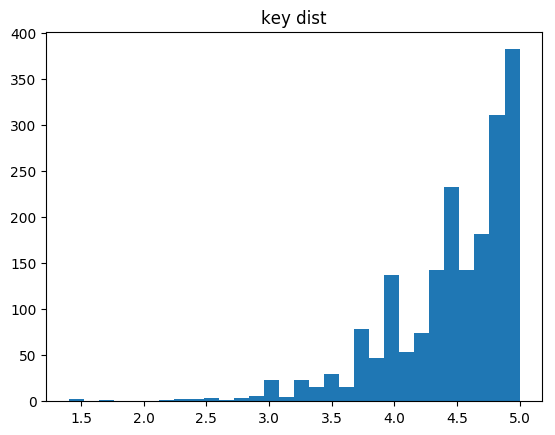

In [324]:
n=10
plt.hist([filterededata[i,n] for i in 1:size(filterededata)[1] if filterededata[i,n] != nothing], density = false, bins = 30);
title("key dist");

In [327]:
#overall average professor and course scores
profscoreavg = sum(profdata)/length(profdata)
coursescoreavg = sum(coursedata)/length(coursedata)
println(profscoreavg," ", coursescoreavg)

86.68546880269814 80.05012858347392


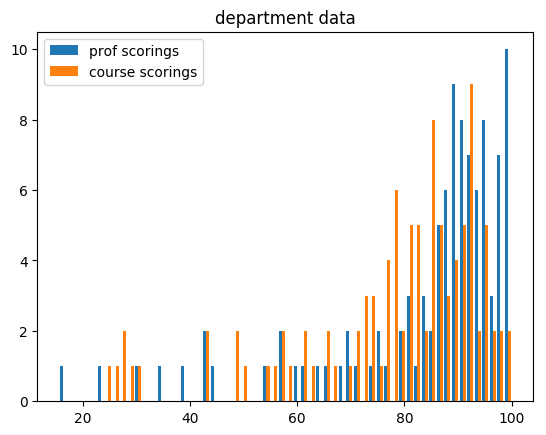

PyObject Text(0.5, 1.0, 'department data')

In [258]:
#department specific course effectiveness dist
deptdata = permutedims(convert(Array{Any,2}, hcat([scoredData[i,:] for i in 1:size(scoredData)[1] if scoredData[i,3] == "MATH"]...)))
# deptdata = deptdata[:,15]
# deptdata = [i for i in deptdata if i != nothing]

plt.hist(deptdata[:,20:21]', bins = 60);
legend(["prof scorings", "course scorings"]);
title("department data")

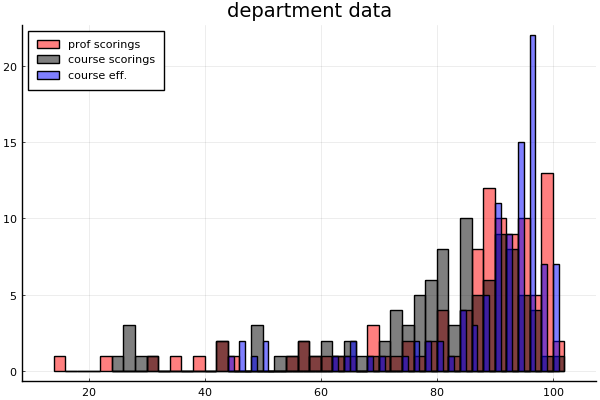

In [256]:
pyplot()

histogram([deptdata[:,20],deptdata[:,21],deptdata[:,15]./5*100], fillalpha=0.5, fillcolor=[:red :black :blue], bins=60, label=["prof scorings" "course scorings" "course eff."], title = "department data")

In [992]:
sort(filteredData[:,21])

2184-element Array{Any,1}:
   0.0
  18.709
  18.799
  19.088
  19.12
  24.869
  25.033
  25.177
  25.692
  26.381
  26.411
  26.638
  26.659
   ⋮
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0

In [993]:
findall(x->x==0.0, filteredData[:,21])

1-element Array{Int64,1}:
 630

In [994]:
filteredData[630,:]

21-element Array{Any,1}:
  "Fall"
  "College of Computing"
  "CS"
  "4803"
  "Special Topics - Langauge & Computers"
  nothing
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
  nothing
  nothing
  nothing
  nothing
  nothing
 0.0
 0.0

In [947]:
deptlists = unique(filteredData[:,3])
deptcount = []
for dept in deptlist
    push!(deptcount, (dept, length(findall(x->x==dept,filteredData[:,3]))))
end
println(deptcount)
keys[[7 15 6]]

Any[("College of Business", 0), ("College of Engineering", 0), ("College of Sciences", 0), ("College of Liberal Arts", 0), ("College of Design", 0), ("Professional Education", 0), ("College of Registrar", 0), ("College of Computing", 0)]


1×3 Array{String,2}:
 "Instructor: Overall effectiveness"  …  "Hours Per Week"

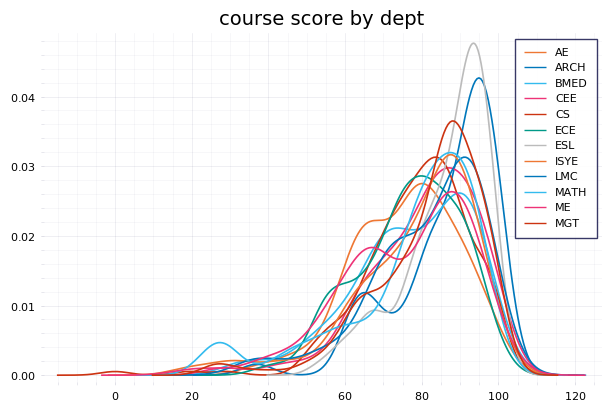

In [957]:
pyplot()
deptlist = unique(filteredData[:,3])
density(title="course score by dept")
for dept in deptlist
    dataset = remnothing(filteredData[findall(x->x==dept,filteredData[:,3]),:],21)
    if length(dataset) >= 60
        density!(dataset, bins=40, show=true, legend=true, label=dept, fillalpha=0.1)
    end
end

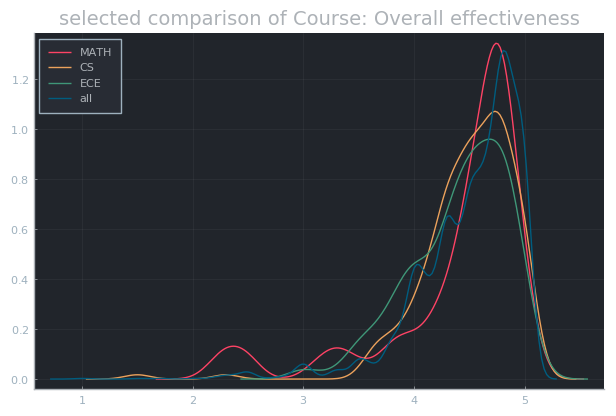

In [968]:
value = 15
plot(title="selected comparison of "*keys[value])
deptlisting = ["MATH", "CS", "ECE"]
for dept in deptlisting
    dataset = remnothing(filteredData[findall(x->x==dept,filteredData[:,3]),:],value);
    plot!(dataset, bins=20, show=true, legend=true, label=dept, fillalpha=0.5, seriestype=:density);
end
plot!(remnothing(filteredData,value), bins=20, show=true, legend=true, label="all", fillalpha=0.1, seriestype=:density);

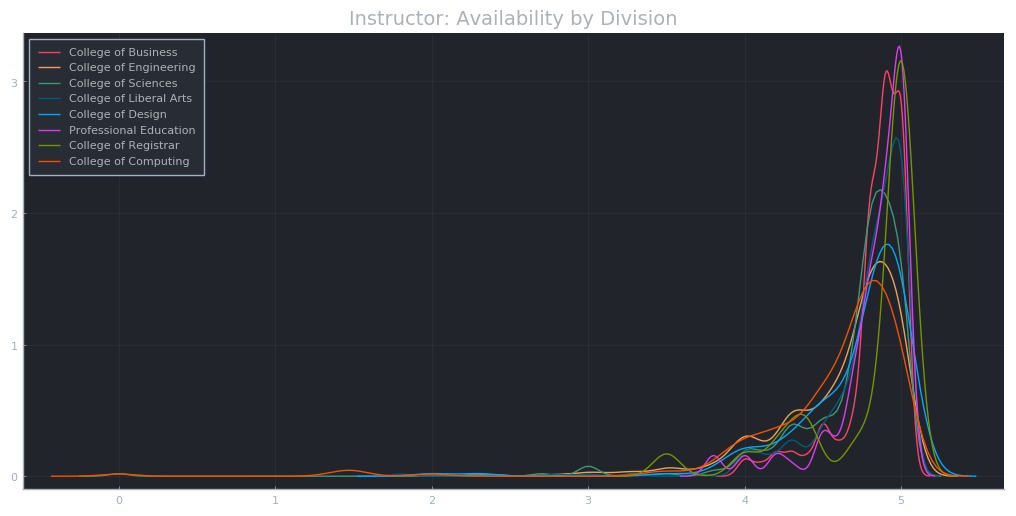

In [989]:
i=9
j=2
theme(:juno)
deptlist = unique(filteredData[:,j])
density(title=keys[i]*" by "*keys[j], size=(1000,500))
for dept in deptlist
    density!(remnothing(filteredData[findall(x->x==dept,filteredData[:,j]),:],i), bins=40, show=true, legend=true, label=dept, fillalpha=0.3)
end

In [987]:
keys[7:20]

14-element Array{String,1}:
 "Instructor: Overall effectiveness"
 "Instructor: Feedback helpfulness"
 "Instructor: Availability"
 "Instructor: Stimulates interest"
 "Instructor: Enthusiasm"
 "Instructor: Respect for students"
 "Instructor: Communicated how to succeed"
 "Instructor: Clarity"
 "Course: Overall effectiveness"
 "Course: Assignments measured knowledge"
 "Course: Amount learned"
 "Student: Percent homework completion"
 "Student: Percent attendance"
 "Prof Score"

In [862]:
findall(x->x=="College of Engineering",filteredData[:,2])

100.0

In [ ]:
unique(filteredData[:,2])

In [259]:
deptdata2 = permutedims(convert(Array{Any,2}, hcat([scoredData[i,:] for i in 1:size(scoredData)[1] if scoredData[i,3] == "CX"]...)))
show(deptdata2)

Any["Fall" "College of Computing" "CX" "4010" "Computational Prob Solv" 8.1 4.6 4.3 4.8 4.6 4.8 4.9 4.8 4.6 4.6 4.3 4.6 95.0 95.0 85.414 82.325; "Fall" "College of Computing" "CX" "4140" "Comp Model Algorithms" 6.5 4.3 3.7 4.0 3.3 3.8 4.0 4.0 4.2 4.1 4.0 4.0 94.9 94.7 68.865 66.131; "Fall" "College of Computing" "CX" "4242" "Data & Visual Analytics" 11.3 4.5 3.7 4.5 4.2 4.7 4.3 4.6 4.2 4.2 3.9 4.4 94.9 60.0 77.949 69.898; "Fall" "College of Computing" "CX" "4640" "Numerical Analysis I" 8.2 4.8 4.6 4.4 4.6 4.9 4.6 4.1 4.4 4.6 3.4 4.4 95.0 94.8 88.851 76.325]

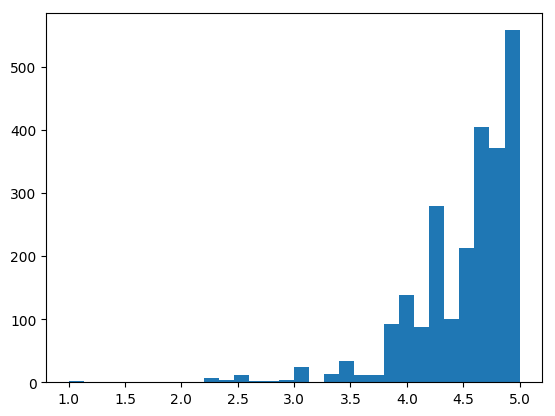

In [152]:
#overall course effectiveness
plotdata = cdata[:,15]
plotdata = [i for i in plotdata if i != nothing]
plt.hist(ceffectiveness, bins = 30);

For Instructor: Overall effectiveness variance is 90.842 and skew is -3.217
For Instructor: Feedback helpfulness variance is 174.2 and skew is -1.901
For Instructor: Availability variance is 76.989 and skew is -3.789
For Instructor: Stimulates interest variance is 105.612 and skew is -1.854
For Instructor: Enthusiasm variance is 80.523 and skew is -3.255
For Instructor: Respect for students variance is 74.568 and skew is -3.939
For Instructor: Communicated how to succeed variance is 97.683 and skew is -3.053
For Instructor: Clarity variance is 124.482 and skew is -2.256
For Course: Overall effectiveness variance is 92.406 and skew is -1.975
For Course: Assignments measured knowledge variance is 127.553 and skew is -1.358


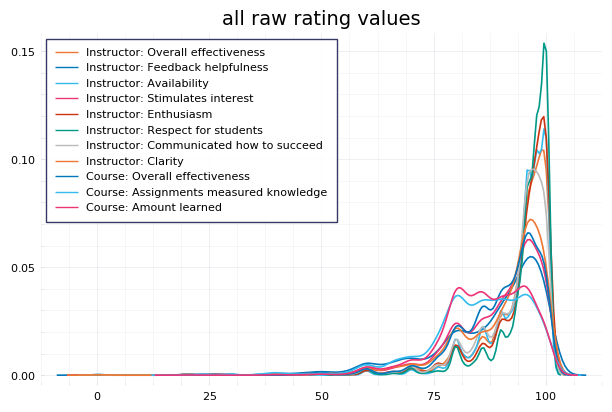

For Course: Amount learned variance is 90.404 and skew is -1.006


In [847]:
theme(:vibrant)
density(title = "all raw rating values")
for i in 7:17
    density!(remnothing(scoredData,i)./5*100, bins = 60, show = true, label=keys[i]);
    println("For ",keys[i], " variance is ", round(var(remnothing(scoredData,i)./5*100),digits=3), " and skew is ", round(skewness(remnothing(scoredData,i)./5*100),digits=3))
end
# for i in 18:19
#     density!(remnothing(scoredData,i), bins = 60, show = true, label=keys[i]);
# end
# density(title = titlen)
# for i = indices
#     density!(remnothing(filteredData,i)./5*100, label=keys[i], show = true)
# end

In [654]:
scoredData[:,7:19]

2372×13 Array{Any,2}:
 4.8  4.6  4.8  4.3  4.8  4.9  4.8  4.7  4.7  4.4       4.5  95.0       95.0
 4.8  4.5  4.8  4.3  4.9  4.8  4.9  4.7  4.7  4.5       4.6  95.0       94.8
 4.7  4.5  4.8  4.0  4.7  4.9  4.6  4.5  4.6  4.6       4.3  95.0       94.8
 4.9  4.4  4.8  4.8  4.8  4.9  4.7  4.6  4.7  4.3       4.0  95.0       94.9
 5.0  5.0  5.0  5.0  5.0  5.0  4.8  4.8  5.0  4.3       4.8  95.0       94.8
 4.9  3.7  4.9  4.3  4.7  4.7  4.7  4.3  4.7  3.9       4.3  95.0       95.0
 4.1  3.1  4.1  4.1  4.4  3.7  4.2  4.0  4.1  4.0       4.5  95.0       84.6
 4.9  4.8  4.8  4.8  4.9  5.0  4.9  4.8  4.7  4.5       4.9  95.0       94.9
 4.5  3.8  4.5  3.9  4.2  4.2  4.3  3.8  3.9  4.0       4.1  94.9       72.5
 4.5  5.0  4.5  4.0  4.5  4.0  4.0  4.5  4.0  4.5       4.5  95.0       85.0
 4.6  4.0  4.7  4.0  4.4  4.7  4.6  4.4  4.4  4.2       4.4  95.0       94.7
 3.9  3.0  4.7  3.8  4.8  4.8  4.8  4.3  3.8  4.0       3.8  95.0       95.0
 4.7  4.2  4.8  4.3  4.7  4.7  4.8  4.3  4.0  3.5     

In [347]:
println(size(scoredData))
println(size(filteredData))
println(size(undergradData))

(2372, 21)
(2184, 21)
(1217, 21)
